In [1]:
import sys
import os
sys.path.append(os.path.abspath('../../'))

In [84]:
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
from torchvision import transforms
from src.data import MultimodalDataset
from src.models.image_encoder import ImageEncoder


In [15]:
captions_path = '../../data/mscoco/annotations/captions_val2017.json'


with open(captions_path, 'r') as f:
    captions = json.load(f)



In [16]:
len(captions['annotations'])

25014

In [17]:
captions['annotations'][0]

{'image_id': 179765,
 'id': 38,
 'caption': 'A black Honda motorcycle parked in front of a garage.'}

In [18]:
captions['images'][2]

{'license': 4,
 'file_name': '000000252219.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000252219.jpg',
 'height': 428,
 'width': 640,
 'date_captured': '2013-11-14 22:32:02',
 'flickr_url': 'http://farm4.staticflickr.com/3446/3232237447_13d84bd0a1_z.jpg',
 'id': 252219}

In [19]:
captions['annotations'][2]['image_id']

190236

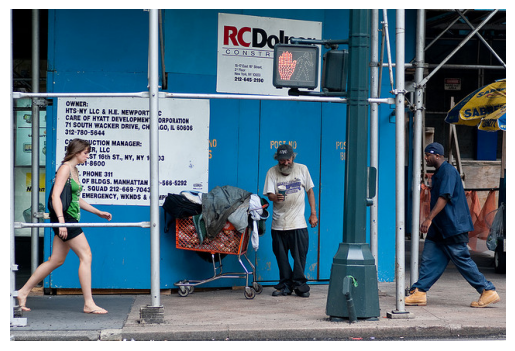

An office cubicle with four different types of computers.


In [82]:
idx = 2
img = mpimg.imread(os.path.join('../../data/mscoco/val2017', captions['images'][idx]['file_name']))
plt.imshow(img)
plt.axis('off')
plt.show()
print(captions['annotations'][idx]['caption'])

In [29]:
id2file = {img['id']: img['file_name'] for img in captions['images']}

image_filename_caption_pairs = []
for ann in captions['annotations']:
    caption = ann['caption']
    filename = id2file.get(ann['image_id'])
    if filename:
        image_filename_caption_pairs.append((filename, caption))

In [51]:
[caption for caption in image_filename_caption_pairs if caption[0] == image_filename_caption_pairs[idx][0]]

[('000000179765.jpg', 'A black Honda motorcycle parked in front of a garage.'),
 ('000000179765.jpg', 'A Honda motorcycle parked in a grass driveway'),
 ('000000179765.jpg', 'A black Honda motorcycle with a dark burgundy seat.'),
 ('000000179765.jpg',
  'Ma motorcycle parked on the gravel in front of a garage'),
 ('000000179765.jpg', 'A motorcycle with its brake extended standing outside')]

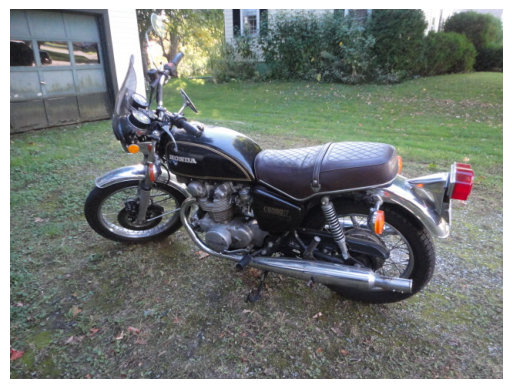

A black Honda motorcycle with a dark burgundy seat.


In [56]:
img = mpimg.imread(os.path.join('../../data/mscoco/val2017', image_filename_caption_pairs[idx][0]))
plt.imshow(img)
plt.axis('off')
plt.show()
print(image_filename_caption_pairs[idx][1])

In [40]:
from collections import Counter

# Count occurrences of each image filename in image_filename_caption_pairs
filename_counts = Counter([pair[0] for pair in image_filename_caption_pairs])

# Get list of filenames that appear more than once
duplicates = [filename for filename, count in filename_counts.items() if count > 1]
len(duplicates)


5000

In [49]:
filename_counts.most_common()[-10:]

[('000000522638.jpg', 5),
 ('000000376322.jpg', 5),
 ('000000375430.jpg', 5),
 ('000000189436.jpg', 5),
 ('000000085089.jpg', 5),
 ('000000018380.jpg', 5),
 ('000000142620.jpg', 5),
 ('000000541634.jpg', 5),
 ('000000064084.jpg', 5),
 ('000000537802.jpg', 5)]

In [85]:
img_path = '../../data/mscoco/val2017'
captions_path = '../../data/mscoco/annotations/captions_val2017.json'


transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop((224, 224)),
    transforms.ToTensor(),
])

dataset = MultimodalDataset(img_path, captions_path, transform=transforms, freq_threshold=1)

In [87]:
sample_dataset = dataset[0]


In [89]:
# Initialize the ImageEncoder
image_encoder = ImageEncoder(in_channels=3, image_size=(224, 224), latent_dim=128)
image_encoder.eval()  # Set to evaluation mode

# Get a sample from the dataset
sample_image, _ = dataset[0]  # Assuming the dataset is already initialized
sample_image = sample_image.unsqueeze(0)  # Add batch dimension

# Perform a forward pass
mu, logvar = image_encoder(sample_image)

# Print the outputs
print("Latent mean (mu):", mu)
print("Latent log-variance (logvar):", logvar)

Latent mean (mu): tensor([[ 0.0091, -0.0003,  0.0105,  0.0135, -0.0236, -0.0087, -0.0326,  0.0244,
         -0.0211,  0.0071,  0.0388, -0.0265, -0.0018, -0.0030, -0.0330, -0.0151,
          0.0324, -0.0154, -0.0207, -0.0463,  0.0087, -0.0278, -0.0192, -0.0186,
         -0.0260,  0.0249, -0.0093, -0.0077,  0.0108,  0.0039,  0.0289, -0.0222,
         -0.0307, -0.0024,  0.0078,  0.0187, -0.0150, -0.0017, -0.0022, -0.0068,
         -0.0194, -0.0212, -0.0176, -0.0249,  0.0169, -0.0218,  0.0226,  0.0165,
         -0.0134, -0.0210,  0.0344, -0.0048, -0.0056, -0.0179,  0.0042, -0.0382,
         -0.0204,  0.0231, -0.0276, -0.0097,  0.0043,  0.0443, -0.0025,  0.0211,
          0.0157,  0.0320, -0.0156, -0.0227, -0.0179,  0.0004,  0.0045,  0.0248,
         -0.0082,  0.0329,  0.0275,  0.0179, -0.0183,  0.0227, -0.0036,  0.0041,
          0.0095,  0.0264,  0.0272,  0.0126,  0.0501, -0.0046, -0.0035,  0.0259,
          0.0094, -0.0157, -0.0269, -0.0253, -0.0078, -0.0399,  0.0336, -0.0133,
         -

In [90]:
# Create a sample dataset of 100 images
sample_dataset = [dataset[i] for i in range(100)]

# Initialize the ImageEncoder
image_encoder = ImageEncoder(in_channels=3, image_size=(480, 640), latent_dim=128)
image_encoder.eval()  # Set to evaluation mode

# Perform forward passes on the sample dataset
for idx, (sample_image, _) in enumerate(sample_dataset):
    sample_image = sample_image.unsqueeze(0)  # Add batch dimension
    print(sample_image.shape)  # Print the shape of the sample image
    # mu, logvar = image_encoder(sample_image)
    # print(f"Image {idx+1}: Latent mean (mu): {mu}, Latent log-variance (logvar): {logvar}")

torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1,